#**LightGBM Model**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, classification_report, make_scorer
import joblib
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Mounted at /content/drive


In [2]:
df_main = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df_main.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,PREV_SK_ID_PREV_COUNT,PREV_SK_ID_CURR_FIRST,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MEDIAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MEDIAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MEDIAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MEDIAN,PREV_NAME_CONTRACT_TYPE_<LAMBDA>,PREV_WEEKDAY_APPR_PROCESS_START_<LAMBDA>,PREV_NAME_CASH_LOAN_PURPOSE_<LAMBDA>,PREV_NAME_CONTRACT_STATUS_<LAMBDA>,PREV_NAME_PAYMENT_TYPE_<LAMBDA>,PREV_CODE_REJECT_REASON_<LAMBDA>,PREV_NAME_CLIENT_TYPE_<LAMBDA>,PREV_NAME_GOODS_CATEGORY_<LAMBDA>,PREV_NAME_PORTFOLIO_<LAMBDA>,PREV_NAME_PRODUCT_TYPE_<LAMBDA>,PREV_CHANNEL_TYPE_<LAMBDA>,PREV_NAME_SELLER_INDUSTRY_<LAMBDA>,PREV_NAME_YIELD_GROUP_<LAMBDA>,PREV_PRODUCT_COMBINATION_<LAMBDA>,PREV_NFLAG_LAST_APPL_IN_DAY_MAX,PREV_NFLAG_INSURED_ON_APPROVAL_MAX,PREV_CNT_PAYMENT_MAX,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_YEARS_DECISION_MEAN,PREV_YEARS_FIRST_DRAWING_MEAN,PREV_YEARS_FIRST_DUE_MEAN,PREV_YEARS_LAST_DUE_1ST_VERSION_MEAN,PREV_YEARS_LAST_DUE_MEAN,PREV_YEARS_TERMINATION_MEAN,TARGET
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806,1.744011,9.987680,5.804244,3.104723,1.0,100002.0,9251.775000,9251.7750,179055.000000,179055.00,179055.000000,179055.0,179055.000000,179055.00,Consumer loans,SATURDAY,XAP,Approved,XNA,XAP,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest,1.0,0.0,24.0,9.000000,500.000000,1.659138,999.980835,1.546886,0.342231,0.068446,0.046543,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.544235,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,3.252567,3.247091,0.796715,2.266940,3.0,100003.0,56553.990000,64567.6650,435436.500000,337500.00,484191.000000,348637.5,435436.500000,337500.00,Consumer loans,FRIDAY,XAP,Approved,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,Cash X-Sell: low,1.0,1.0,12.0,14.666667,533.000000,3.572895,999.980835,3.488935,2.749715,2.886607,2.867442,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,1,1,1,1,1,0,Laborers,1.0,2,

In [3]:
X = df_main.drop('TARGET', axis=1)
y = df_main['TARGET']

In [4]:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

for col in cat_cols:
    X[col] = X[col].astype('category')

In [5]:
lgb_model = LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1,
    n_estimators=500
)


In [6]:
param_dist = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [7]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [8]:
scorer = make_scorer(f1_score)

In [9]:
rs_cv = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=skf,
    verbose=2,
    random_state=42
)


In [10]:
rs_cv.fit(X, y, categorical_feature=cat_indices)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
[LightGBM] [Info] Number of positive: 109974, number of negative: 137469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11837
[LightGBM] [Info] Number of data points in the train set: 247443, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444442 -> initscore=-0.223154
[LightGBM] [Info] Start training from score -0.223154
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=-1, num_leaves=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=  50.9s
[LightGBM] [Info] Number of positive: 109975, number of negative: 137469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097813 seconds.
You can set `force_row_wise=true` to remove the overhea

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(n_estimators=500, n_jobs=-1,
                                            objective='binary',
                                            random_state=42),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20, 30],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=2)

In [11]:
print("\nBest F1 score:", rs_cv.best_score_)
print("Best parameters:", rs_cv.best_params_)


Best F1 score: 0.9341121967396442
Best parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'num_leaves': 70, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [13]:
final_model = LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1,
    n_estimators=500,
    **rs_cv.best_params_
)

In [14]:
final_model.fit(X_train, y_train, categorical_feature=cat_cols)

[LightGBM] [Info] Number of positive: 117306, number of negative: 146634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11839
[LightGBM] [Info] Number of data points in the train set: 263940, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444442 -> initscore=-0.223154
[LightGBM] [Info] Start training from score -0.223154


LGBMClassifier(colsample_bytree=0.8, max_depth=20, n_estimators=500, n_jobs=-1,
               num_leaves=70, objective='binary', random_state=42,
               reg_alpha=0.5, reg_lambda=0.5, subsample=0.6)

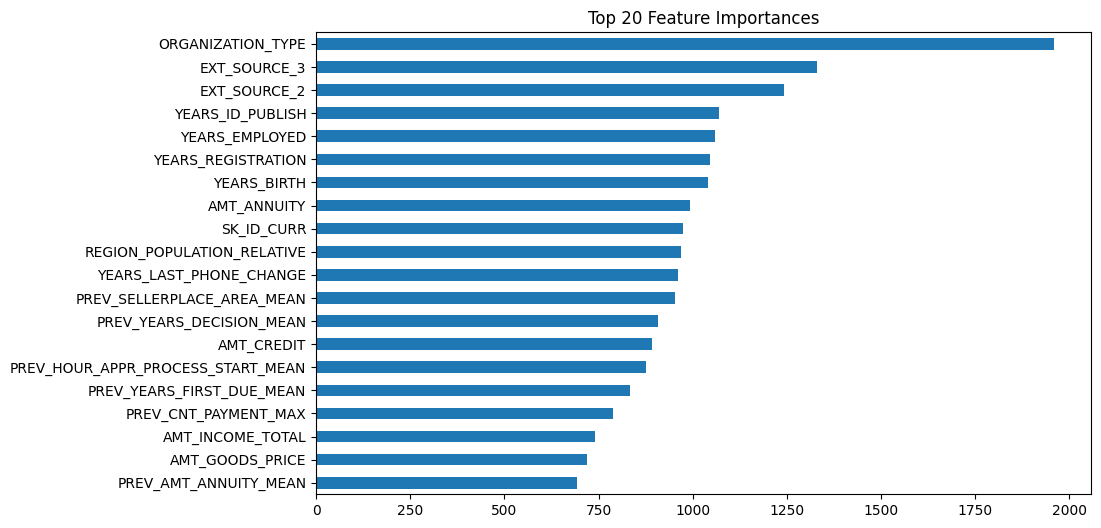

In [15]:
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Top 20 Feature Importances")
plt.show()


In [16]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     36658
           1       0.99      0.88      0.93     29327

    accuracy                           0.94     65985
   macro avg       0.95      0.94      0.94     65985
weighted avg       0.95      0.94      0.94     65985



In [17]:
print(accuracy_score(y_test, y_pred))

0.9447298628476168


In [18]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[36454   204]
 [ 3443 25884]]


In [19]:
y_prob = final_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9700875896946709


In [20]:
joblib.dump(final_model, 'LoanDefaulter_LightGBM.pkl')

['LoanDefaulter_LightGBM.pkl']

In [21]:

files.download('LoanDefaulter_LightGBM.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
joblib.dump(final_model, '/content/drive/MyDrive/LoanDefaulter_LightGBM.pkl')


['/content/drive/MyDrive/LoanDefaulter_LightGBM.pkl']